In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib as mpl

import os

## ISMR Estimation plots

In [2]:
oa_all = pd.read_table("Optimal_averaging_using_ensemble_entire_set.dat", sep="\s+", header=None)
oa_5 = pd.read_table("Optimal_averaging_using_ensemble_500_locations.dat", sep="\s+", header=None)
oa_8 = pd.read_table("Optimal_averaging_using_ensemble_800_locations.dat", sep="\s+", header=None)
oa_10 = pd.read_table("Optimal_averaging_using_ensemble_1000_locations.dat", sep="\s+", header=None)
oa_15 = pd.read_table("Optimal_averaging_using_ensemble_1500_locations.dat", sep="\s+", header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/kc/k6tljvv97m7dzy42p3g0h16m0000gn/T/ipykernel_10423/4220722450.py:1: SyntaxWarning: invalid escape sequence '\s'
  oa_all = pd.read_table("Optimal_averaging_using_ensemble_entire_set.dat", sep="\s+", header=None)
/var/folders/kc/k6tljvv97m7dzy42p3g0h16m0000gn/T/ipykernel_10423/4220722450.py:2: SyntaxWarning: invalid escape sequence '\s'
  oa_5 = pd.read_table("Optimal_averaging_using_ensemble_500_locations.dat", sep="\s+", header=None)
/var/folders/kc/k6tljvv97m7dzy42p3g0h16m0000gn/

<>:10: SyntaxWarning: invalid escape sequence '\z'
<>:11: SyntaxWarning: invalid escape sequence '\z'
<>:12: SyntaxWarning: invalid escape sequence '\z'
<>:13: SyntaxWarning: invalid escape sequence '\z'
<>:14: SyntaxWarning: invalid escape sequence '\z'
<>:10: SyntaxWarning: invalid escape sequence '\z'
<>:11: SyntaxWarning: invalid escape sequence '\z'
<>:12: SyntaxWarning: invalid escape sequence '\z'
<>:13: SyntaxWarning: invalid escape sequence '\z'
<>:14: SyntaxWarning: invalid escape sequence '\z'
/var/folders/kc/k6tljvv97m7dzy42p3g0h16m0000gn/T/ipykernel_10423/682405763.py:10: SyntaxWarning: invalid escape sequence '\z'
  ax[j].plot(years, oa_all.iloc[j], color= colors[0], linewidth=2, label='OA($\zeta=0.8$), $K=N$')
/var/folders/kc/k6tljvv97m7dzy42p3g0h16m0000gn/T/ipykernel_10423/682405763.py:11: SyntaxWarning: invalid escape sequence '\z'
  ax[j].plot(years, oa_5.iloc[j], color= colors[1], linewidth=2, label='OA($\zeta=0.8$), $K=500$' )
/var/folders/kc/k6tljvv97m7dzy42p3g0h16

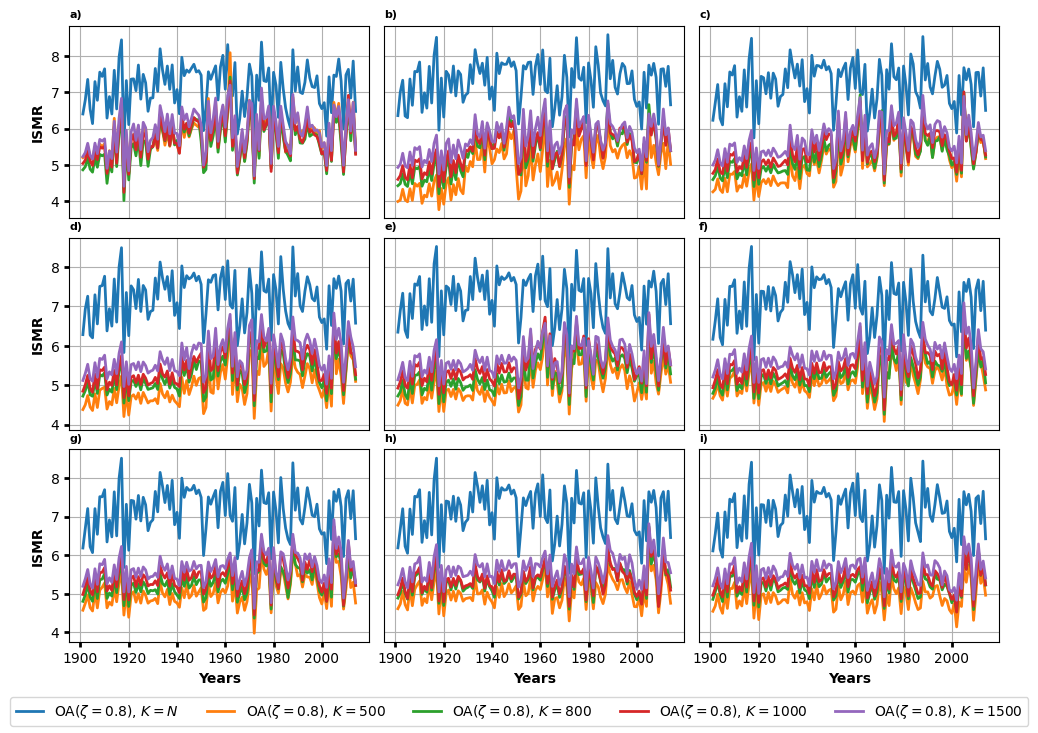

In [3]:
years = np.linspace(start=1901, stop=2014, num=114)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
titles = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)']
fig, ax = plt.subplots(3, 3,figsize=(12, 8), sharex='col', sharey='row', 
                           gridspec_kw ={'wspace': 0.05, 'hspace': 0.1, 
                                    'width_ratios':[1, 1, 1], 'height_ratios': [1, 1, 1]})
ax = ax.flatten()
for j in range(9):
    ax[j].plot(years, oa_all.iloc[j], color= colors[0], linewidth=2, label='OA($\zeta=0.8$), $K=N$')
    ax[j].plot(years, oa_5.iloc[j], color= colors[1], linewidth=2, label='OA($\zeta=0.8$), $K=500$' )
    ax[j].plot(years, oa_8.iloc[j], color= colors[2], linewidth=2, label='OA($\zeta=0.8$), $K=800$')
    ax[j].plot(years, oa_10.iloc[j], color= colors[3], linewidth=2, label='OA($\zeta=0.8$), $K=1000$')
    ax[j].plot(years, oa_15.iloc[j], color= colors[4], linewidth=2, label='OA($\zeta=0.8$), $K=1500$')
    ax[j].set_title(titles[j],loc='left', fontsize=8, fontweight='bold')
    ax[j].grid()
    if j != 0 and j != 3 and j != 6 :
        ax[j].tick_params(left=False)
    if j < 6 :
        ax[j].tick_params(bottom=False)
    if j == 0 or j == 3 or j == 6 :
        ax[j].tick_params(axis='y',which='major',direction='out',width=2,labelsize=10)
        ax[j].set_ylabel('ISMR', fontsize=10, fontweight='bold')
    if j == 8 or j == 7 or j == 6 :
        ax[j].tick_params(axis='x',which='major',direction='out',width=2,labelsize=10)
        ax[j].set_xlabel('Years', fontsize=10, fontweight='bold')
fig.legend(*ax[0].get_legend_handles_labels(),
            loc='lower center', ncol=5, fontsize=10)
# plt.savefig('ISMR_Ensembel_updated.png', dpi=300, bbox_inches = 'tight')

## ISMR Relative Error Plots

In [4]:
re5 = (oa_all - oa_5)/oa_all
re8 = (oa_all - oa_8)/oa_all
re10 = (oa_all - oa_10)/oa_all
re15 = (oa_all - oa_15)/oa_all

## Relative Error plots

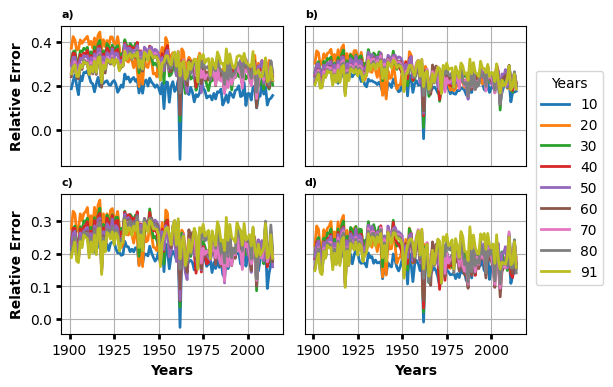

In [5]:
fig, ax = plt.subplots(2, 2,figsize=(6, 4), sharex='col', sharey='row', 
                           gridspec_kw ={'wspace': 0.1, 'hspace': 0.2, 
                                    'width_ratios':[1, 1], 'height_ratios': [1, 1]})
ax = ax.flatten()
labels = ['10', '20', '30', '40', '50', '60', '70', '80', '91']
for j in range(9):
    ax[0].plot(years, re5.iloc[j], color= colors[j], linewidth=2, label=labels[j])
    ax[0].set_ylabel('Relative Error', fontsize=10, fontweight='bold')
    ax[0].tick_params(axis='y',which='major',direction='out',width=2,labelsize=10)
    ax[0].tick_params(bottom=False)
    ax[0].set_title('a)',loc='left', fontsize=8, fontweight='bold')
    ax[0].grid()
    ax[1].plot(years, re8.iloc[j], color= colors[j], linewidth=2, label=labels[j])
    ax[1].tick_params(left=False)
    ax[1].tick_params(bottom=False)
    ax[1].set_title('b)',loc='left', fontsize=8, fontweight='bold')
    ax[1].grid()
    ax[2].plot(years, re10.iloc[j], color= colors[j], linewidth=2, label=labels[j])
    ax[2].tick_params(axis='y',which='major',direction='out',width=2,labelsize=10)
    ax[2].tick_params(axis='x',which='major',direction='out',width=2,labelsize=10)
    ax[2].set_ylabel('Relative Error', fontsize=10, fontweight='bold')
    ax[2].set_xlabel('Years', fontsize=10, fontweight='bold')
    ax[2].set_title('c)',loc='left', fontsize=8, fontweight='bold')
    ax[2].grid()
    ax[3].plot(years, re15.iloc[j], color= colors[j], linewidth=2, label=labels[j])
    ax[3].tick_params(axis='x',which='major',direction='out',width=2,labelsize=10)
    ax[3].set_xlabel('Years', fontsize=10, fontweight='bold')
    ax[3].tick_params(left=False)
    ax[3].set_title('d)',loc='left', fontsize=8, fontweight='bold')
    ax[3].grid()
    # ax[3].set_title(titles[j],loc='left', fontsize=8, fontweight='bold')
    # ax[j].grid()
#     if j != 0 and j != 3 and j != 6 :
#         ax[j].tick_params(left=False)
#     if j < 6 :
#         ax[j].tick_params(bottom=False)
#     if j == 0 or j == 3 or j == 6 :
#         ax[j].tick_params(axis='y',which='major',direction='out',width=2,labelsize=10)
#         ax[j].set_ylabel('ISMR', fontsize=10, fontweight='bold')
#     if j == 8 or j == 7 or j == 6 :
#         ax[j].tick_params(axis='x',which='major',direction='out',width=2,labelsize=10)
#         ax[j].set_xlabel('Years', fontsize=10, fontweight='bold')
fig.legend(*ax[0].get_legend_handles_labels(),
            loc='right', ncol=1, fontsize=10, bbox_to_anchor=(1.04, 0.5), title="Years")
# plt.savefig('rel_er_ensembel_updated.png', dpi=300, bbox_inches = 'tight')

## GORE and Balance metrics

In [6]:
oa_ac_gpr_5 = pd.read_csv('error_correction_Data_GPR/spa_estimation_500_locations_ac_GPR')
oa_ac_gpr_8 = pd.read_csv('error_correction_Data_GPR/spa_estimation_800_locations_ac_GPR')
oa_ac_gpr_10 = pd.read_csv('error_correction_Data_GPR/spa_estimation_1000_locations_ac_GPR')
oa_ac_gpr_15 = pd.read_csv('error_correction_Data_GPR/spa_estimation_1500_locations_ac_GPR')

oa_ac_xgb_5 = pd.read_csv('error_correction_Data_Xgb/spa_estimation_500_locations_ac_Xgboost')
oa_ac_xgb_8 = pd.read_csv('error_correction_Data_Xgb/spa_estimation_800_locations_ac_Xboost')
oa_ac_xgb_10 = pd.read_csv('error_correction_Data_Xgb/spa_estimation_1000_locations_ac_Xboost')
oa_ac_xgb_15 = pd.read_csv('error_correction_Data_Xgb/spa_estimation_1500_locations_ac_Xgboost')

In [7]:
def get_metrics(actual, estimate):
    numerator = ((actual.apply(np.sqrt).values[:, -23:] - estimate.apply(np.sqrt).values[:, 1:].T)**2).sum(axis=1)
    denominator = ((actual.apply(np.sqrt).values[:, -23:] - (actual.apply(np.sqrt).values[:, -23:]).mean(axis=1, keepdims=True))**2).sum(axis=1)
    gore = 1 - (numerator/denominator)
    balance = estimate.values[:, 1:].T.sum(axis=1, keepdims=True)/actual.values[:, -23:].sum(axis=1, keepdims=True)
    return gore, balance

In [8]:
gore_gpr_5_ac, balance_gpr_5_ac = get_metrics(actual=oa_all, estimate=oa_ac_gpr_5)
gore_gpr_8_ac, balance_gpr_8_ac = get_metrics(actual=oa_all, estimate=oa_ac_gpr_8)
gore_gpr_10_ac, balance_gpr_10_ac = get_metrics(actual=oa_all, estimate=oa_ac_gpr_10)
gore_gpr_15_ac, balance_gpr_15_ac = get_metrics(actual=oa_all, estimate=oa_ac_gpr_15)

gore_xgb_5_ac, balance_xgb_5_ac = get_metrics(actual=oa_all, estimate=oa_ac_xgb_5)
gore_xgb_8_ac, balance_xgb_8_ac = get_metrics(actual=oa_all, estimate=oa_ac_xgb_8)
gore_xgb_10_ac, balance_xgb_10_ac = get_metrics(actual=oa_all, estimate=oa_ac_xgb_10)
gore_xgb_15_ac, balance_xgb_15_ac = get_metrics(actual=oa_all, estimate=oa_ac_xgb_15)

In [9]:
oa_bc_gpr_5 = pd.read_csv('error_correction_Data_GPR/spa_estimation_500_locations_bc_GPR')
oa_bc_gpr_8 = pd.read_csv('error_correction_Data_GPR/spa_estimation_800_locations_bc_GPR')
oa_bc_gpr_10 = pd.read_csv('error_correction_Data_GPR/spa_estimation_1000_locations_bc_GPR')
oa_bc_gpr_15 = pd.read_csv('error_correction_Data_GPR/spa_estimation_1500_locations_bc_GPR')

oa_bc_xgb_5 = pd.read_csv('error_correction_Data_Xgb/spa_estimation_500_locations_bc_Xgboost')
oa_bc_xgb_8 = pd.read_csv('error_correction_Data_Xgb/spa_estimation_800_locations_bc_Xgboost')
oa_bc_xgb_10 = pd.read_csv('error_correction_Data_Xgb/spa_estimation_1000_locations_bc_Xgboost')
oa_bc_xgb_15 = pd.read_csv('error_correction_Data_Xgb/spa_estimation_1500_locations_bc_Xgboost')

In [10]:
gore_gpr_5_bc, balance_gpr_5_bc = get_metrics(actual=oa_all, estimate=oa_bc_gpr_5)
gore_gpr_8_bc, balance_gpr_8_bc = get_metrics(actual=oa_all, estimate=oa_bc_gpr_8)
gore_gpr_10_bc, balance_gpr_10_bc = get_metrics(actual=oa_all, estimate=oa_bc_gpr_10)
gore_gpr_15_bc, balance_gpr_15_bc = get_metrics(actual=oa_all, estimate=oa_bc_gpr_15)

gore_xgb_5_bc, balance_xgb_5_bc = get_metrics(actual=oa_all, estimate=oa_bc_xgb_5)
gore_xgb_8_bc, balance_xgb_8_bc = get_metrics(actual=oa_all, estimate=oa_bc_xgb_8)
gore_xgb_10_bc, balance_xgb_10_bc = get_metrics(actual=oa_all, estimate=oa_bc_xgb_10)
gore_xgb_15_bc, balance_xgb_15_bc = get_metrics(actual=oa_all, estimate=oa_bc_xgb_15)

In [11]:
oa_pred_gpr = pd.read_csv('error_correction_Data_GPR/Prediction_through_entire_set_GPR')
oa_pred_xgb = pd.read_csv('error_correction_Data_Xgb/Prediction_through_entire_set_Xgboost')

In [12]:
gore_pred_gpr, balance_pred_gpr = get_metrics(actual=oa_all, estimate=oa_pred_gpr)
gore_pred_xgb, balance_pred_xgb = get_metrics(actual=oa_all, estimate=oa_pred_xgb)

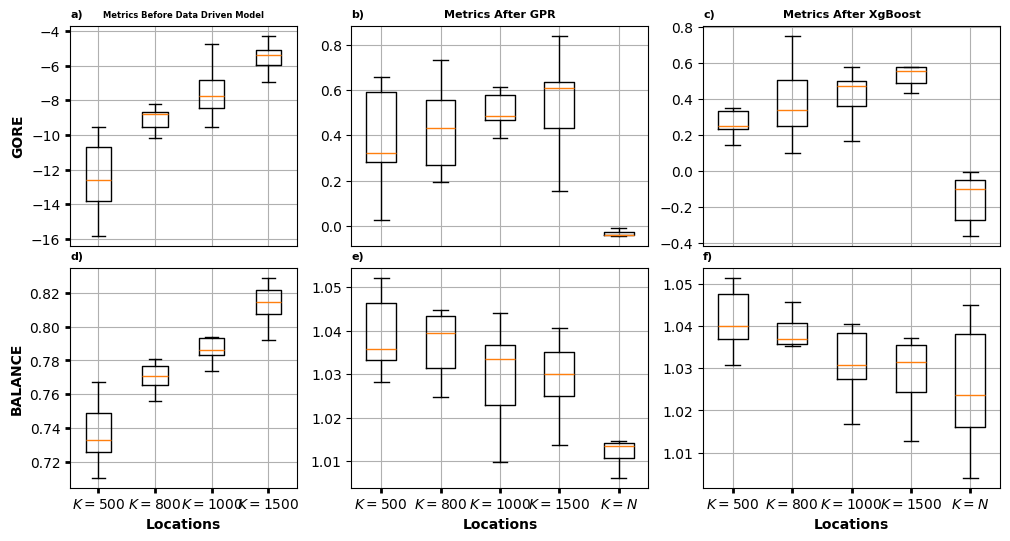

In [13]:
loc = [5, 8, 10, 15]
fig, ax = plt.subplots(2, 3,figsize=(12, 6), sharex='col', 
                           gridspec_kw ={'wspace': 0.2, 'hspace': 0.1, 
                                    'width_ratios':[0.84, 1.1, 1.1], 'height_ratios': [1, 1]})
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
ax = ax.flatten()

bp1 = ax[0].boxplot([gore_gpr_5_bc, gore_gpr_8_bc, gore_gpr_10_bc, gore_gpr_15_bc], showfliers=False)
# for patch, color in zip(bp1['boxes'], colors):
#     patch.set_facecolor(color)
                        
ax[0].tick_params(bottom=False)
ax[0].set_ylabel('GORE', fontsize=10, fontweight='bold')
ax[0].tick_params(axis='y', which='major', direction='out', width=2, labelsize=10)
ax[0].set_title('a)',loc='left', fontsize=8, fontweight='bold')
ax[0].set_title('Metrics Before Data Driven Model', loc='center', fontsize=6, fontweight='bold')
ax[0].grid()

ax[1].boxplot([gore_gpr_5_ac, gore_gpr_8_ac, gore_gpr_10_ac, gore_gpr_15_ac, gore_pred_gpr], showfliers=False)
ax[1].tick_params(bottom=False)
ax[1].set_title('b)',loc='left', fontsize=8, fontweight='bold')
ax[1].set_title('Metrics After GPR', loc='center', fontsize=8, fontweight='bold')
ax[1].grid()

ax[2].boxplot([gore_xgb_5_ac, gore_xgb_8_ac, gore_xgb_10_ac, gore_xgb_15_ac, gore_pred_xgb], showfliers=False)
ax[2].tick_params(bottom=False)
ax[2].set_title('c)',loc='left', fontsize=8, fontweight='bold')
ax[2].set_title('Metrics After XgBoost', loc='center', fontsize=8, fontweight='bold')
ax[2].grid()

ax[3].boxplot([balance_gpr_5_bc.squeeze(), balance_gpr_8_bc.squeeze(), balance_gpr_10_bc.squeeze(), 
               balance_gpr_15_bc.squeeze()], showfliers=False)
ax[3].tick_params(axis='x',which='major',direction='out',width=2,labelsize=10)
ax[3].set_ylabel('BALANCE', fontsize=10, fontweight='bold')
ax[3].tick_params(axis='y', which='major', direction='out', width=2, labelsize=10)
ax[3].set_xticks([1, 2, 3, 4])
ax[3].set_xticklabels(['$K=500$', '$K=800$', '$K=1000$', '$K=1500$'])
ax[3].set_xlabel('Locations', fontsize=10, fontweight='bold')
ax[3].set_title('d)',loc='left', fontsize=8, fontweight='bold')
ax[3].grid()

ax[4].boxplot([balance_gpr_5_ac.squeeze(), balance_gpr_8_ac.squeeze(),
               balance_gpr_10_ac.squeeze(), balance_gpr_15_ac.squeeze(), balance_pred_gpr.squeeze()], showfliers=False)
ax[4].tick_params(axis='x',which='major',direction='out',width=2,labelsize=10)
ax[4].set_xticks([1, 2, 3, 4, 5])
ax[4].set_xticklabels(['$K=500$', '$K=800$', '$K=1000$', '$K=1500$', '$K=N$'])
ax[4].set_xlabel('Locations', fontsize=10, fontweight='bold')
ax[4].set_title('e)',loc='left', fontsize=8, fontweight='bold')
ax[4].grid()

ax[5].boxplot([balance_xgb_5_ac.squeeze(), balance_xgb_8_ac.squeeze(),
               balance_xgb_10_ac.squeeze(), balance_xgb_15_ac.squeeze(), balance_pred_xgb.squeeze()], showfliers=False)
ax[5].tick_params(axis='x',which='major',direction='out',width=2,labelsize=10)
ax[5].set_xticks([1, 2, 3, 4, 5])
ax[5].set_xticklabels(['$K=500$', '$K=800$', '$K=1000$', '$K=1500$', '$K=N$'])
ax[5].set_xlabel('Locations', fontsize=10, fontweight='bold')
ax[5].set_title('f)',loc='left', fontsize=8, fontweight='bold')
ax[5].grid()

# plt.savefig('Metrics_to_evaluate_design.png', dpi=300, bbox_inches = 'tight')

## Error Plots

In [14]:
maeg_5bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_gpr_5.values[:, 1:].T), axis=1)
maeg_8bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_gpr_8.values[:, 1:].T), axis=1)
maeg_10bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_gpr_10.values[:, 1:].T), axis=1)
maeg_15bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_gpr_15.values[:, 1:].T), axis=1)

marg_5bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_gpr_5.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
marg_8bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_gpr_8.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
marg_10bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_gpr_10.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
marg_15bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_gpr_15.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)


maeg_5ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_gpr_5.values[:, 1:].T), axis=1)
maeg_8ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_gpr_8.values[:, 1:].T), axis=1)
maeg_10ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_gpr_10.values[:, 1:].T), axis=1)
maeg_15ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_gpr_15.values[:, 1:].T), axis=1)

marg_5ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_gpr_5.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
marg_8ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_gpr_8.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
marg_10ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_gpr_10.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
marg_15ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_gpr_15.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)

In [15]:
maex_5bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_xgb_5.values[:, 1:].T), axis=1)
maex_8bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_xgb_8.values[:, 1:].T), axis=1)
maex_10bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_xgb_10.values[:, 1:].T), axis=1)
maex_15bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_xgb_15.values[:, 1:].T), axis=1)

marx_5bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_xgb_5.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
marx_8bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_xgb_8.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
marx_10bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_xgb_10.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
marx_15bc = np.mean(np.abs(oa_all.values[:, -23:] - oa_bc_xgb_15.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)


maex_5ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_xgb_5.values[:, 1:].T), axis=1)
maex_8ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_xgb_8.values[:, 1:].T), axis=1)
maex_10ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_xgb_10.values[:, 1:].T), axis=1)
maex_15ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_xgb_15.values[:, 1:].T), axis=1)

marx_5ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_xgb_5.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
marx_8ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_xgb_8.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
marx_10ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_xgb_10.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
marx_15ac = np.mean(np.abs(oa_all.values[:, -23:] - oa_ac_xgb_15.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)

In [16]:
abs_er_gpr_pred = np.mean(np.abs(oa_all.values[:, -23:] - oa_pred_gpr.values[:, 1:].T), axis=1)
abs_rel_er_gpr_pred = np.mean(np.abs(oa_all.values[:, -23:] - oa_pred_gpr.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)
abs_er_xgb_pred = np.mean(np.abs(oa_all.values[:, -23:] - oa_pred_xgb.values[:, 1:].T), axis=1)
abs_rel_er_xgb_pred = np.mean(np.abs(oa_all.values[:, -23:] - oa_pred_xgb.values[:, 1:].T)/oa_all.values[:, -23:], axis=1)

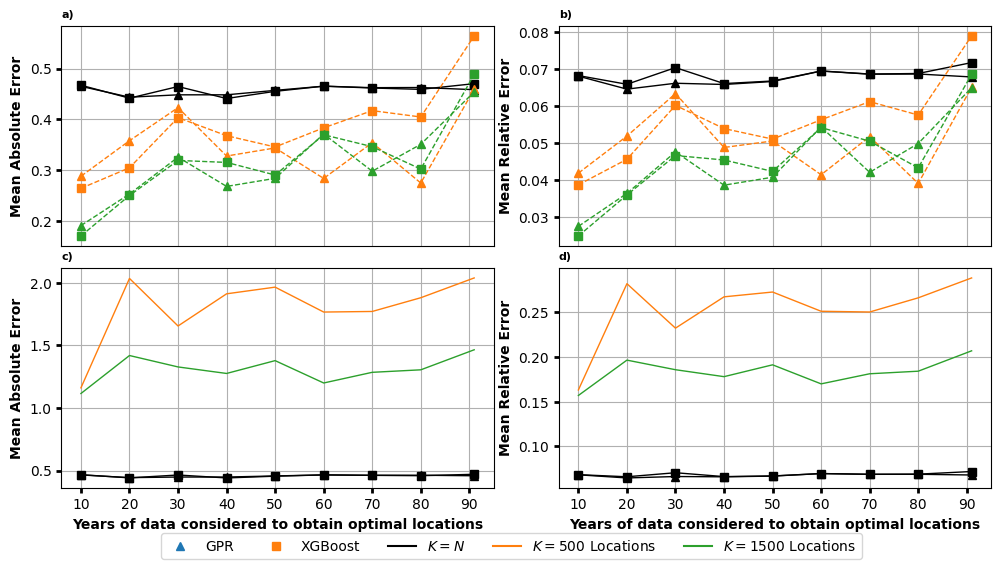

In [17]:
dy = [10, 20, 30, 40, 50, 60, 70, 80, 91]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
fig, ax = plt.subplots(2, 2,figsize=(12, 6), sharex='col', 
                           gridspec_kw ={'wspace': 0.15, 'hspace': 0.1, 
                                    'width_ratios':[1, 1], 'height_ratios': [1, 1]})
ax = ax.flatten()
ax[0].plot(dy, abs_er_gpr_pred, '^-',linewidth=1, color='k')
ax[0].plot(dy, abs_er_xgb_pred, 's-',linewidth=1, color='k')
ax[0].plot(dy, maeg_5ac,'^--', linewidth=1, color=colors[1])
ax[0].plot(dy, maex_5ac,'s--', linewidth=1, color=colors[1])
ax[0].plot(dy, maeg_15ac,'^--', linewidth=1, color=colors[2])
ax[0].plot(dy, maex_15ac,'s--', linewidth=1, color=colors[2])
ax[0].set_ylabel('Mean Absolute Error', fontsize=10, fontweight='bold')
ax[0].tick_params(axis='y',which='major',direction='out',width=2,labelsize=10)
ax[0].set_title('a)',loc='left', fontsize=8, fontweight='bold')
ax[0].tick_params(bottom=False)
ax[0].grid()

ax[1].plot(dy, abs_rel_er_gpr_pred, '^-',linewidth=1, color='k')
ax[1].plot(dy, abs_rel_er_xgb_pred, 's-',linewidth=1, color='k')
ax[1].plot(dy, marg_5ac,'^--', linewidth=1, color=colors[1])
ax[1].plot(dy, marx_5ac,'s--', linewidth=1, color=colors[1])
ax[1].plot(dy, marg_15ac,'^--', linewidth=1, color=colors[2])
ax[1].plot(dy, marx_15ac,'s--', linewidth=1, color=colors[2])
ax[1].set_ylabel('Mean Relative Error', fontsize=10, fontweight='bold')
ax[1].tick_params(axis='y',which='major',direction='out',width=2,labelsize=10)
ax[1].set_title('b)',loc='left', fontsize=8, fontweight='bold')
ax[1].tick_params(bottom=False)
ax[1].grid()

ax[2].plot(dy, abs_er_gpr_pred, '^-',linewidth=1, color='k')
ax[2].plot(dy, abs_er_xgb_pred, 's-',linewidth=1, color='k')
ax[2].plot(dy, maeg_5bc, linewidth=1, color=colors[1])
ax[2].plot(dy, maex_15bc, linewidth=1, color=colors[2])
ax[2].set_ylabel('Mean Absolute Error', fontsize=10, fontweight='bold')
ax[2].set_xlabel('Years of data considered to obtain optimal locations', fontsize=10, fontweight='bold')
ax[2].tick_params(axis='y',which='major',direction='out',width=2,labelsize=10)
ax[2].tick_params(axis='x',which='major',direction='out',width=2,labelsize=10)
ax[2].set_title('c)',loc='left', fontsize=8, fontweight='bold')
ax[2].grid()

ax[3].plot(dy, abs_rel_er_gpr_pred, '^-',linewidth=1, color='k')
ax[3].plot(dy, abs_rel_er_xgb_pred, 's-',linewidth=1, color='k')
ax[3].plot(dy, marg_5bc, linewidth=1, color=colors[1])
ax[3].plot(dy, marx_15bc, linewidth=1, color=colors[2])
ax[3].set_ylabel('Mean Relative Error', fontsize=10, fontweight='bold')
ax[3].set_xlabel('Years of data considered to obtain optimal locations', fontsize=10, fontweight='bold')
ax[3].tick_params(axis='y',which='major',direction='out',width=2,labelsize=10)
ax[3].tick_params(axis='x',which='major',direction='out',width=2,labelsize=10)
ax[3].set_title('d)',loc='left', fontsize=8, fontweight='bold')
ax[3].plot(np.NaN, np.NaN, '^', label='GPR')
ax[3].plot(np.NaN, np.NaN, 's', label='XGBoost')
ax[3].plot(np.NaN, np.NaN, color='k', label='$K=N$')
ax[3].plot(np.NaN, np.NaN, color=colors[1], label='$K=500$ Locations')
ax[3].plot(np.NaN, np.NaN, color=colors[2], label='$K=1500$ Locations')
ax[3].grid()

fig.legend(*ax[3].get_legend_handles_labels(),
            loc='lower center', ncol=5, fontsize=10, bbox_to_anchor=(0.5, -0.02))
# plt.savefig('spa_estimation_comparison.png', dpi=300, bbox_inches = 'tight')

## Forcasting after correction

In [18]:
rel_er_gpr_15 = ((oa_all.values[: ,-23:] - oa_ac_gpr_15.values[:, 1:].T)/oa_all.values[:, -23:])[-1, :]
rel_er_gpr_5 = ((oa_all.values[: ,-23:] - oa_ac_gpr_5.values[:, 1:].T)/oa_all.values[:, -23:])[-1, :]
rel_er_xgb_15 = ((oa_all.values[: ,-23:] - oa_ac_xgb_15.values[:, 1:].T)/oa_all.values[:, -23:])[-1, :]
rel_er_xgb_5 = ((oa_all.values[: ,-23:] - oa_ac_xgb_5.values[:, 1:].T)/oa_all.values[:, -23:])[-1, :]

rel_er_bc_15 = ((oa_all.values[: ,-23:] - oa_bc_xgb_15.values[:, 1:].T)/oa_all.values[:, -23:])[-1, :]
rel_er_bc_5 = ((oa_all.values[: ,-23:] - oa_bc_xgb_5.values[:, 1:].T)/oa_all.values[:, -23:])[-1, :]

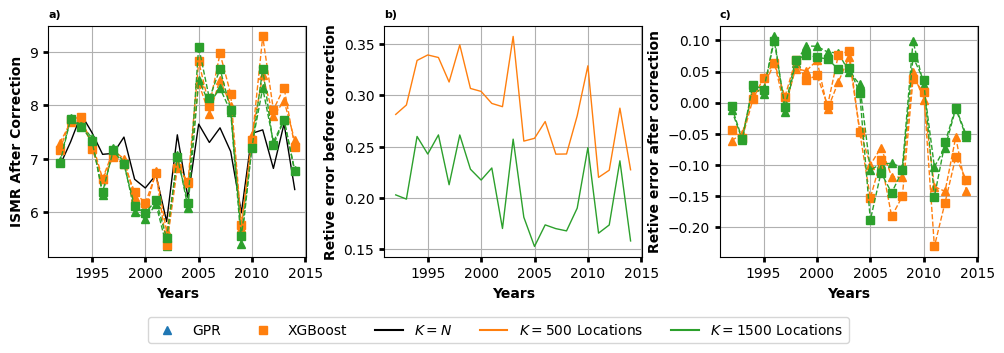

In [19]:
years = np.linspace(start=1992, stop=2014, num=23)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
fig, ax = plt.subplots(1, 3,figsize=(12, 3), sharex='col', 
                           gridspec_kw ={'wspace': 0.3, 'hspace': 0.1, 
                                    'width_ratios':[1, 1, 1], 'height_ratios': [1]})
ax = ax.flatten()

ax[0].plot(years, oa_all.values[-1, -23:], linewidth=1, color='k')
ax[0].plot(years, oa_ac_gpr_5.values[:, -1], '^--', color=colors[1], linewidth=1)
ax[0].plot(years, oa_ac_gpr_15.values[:, -1], '^--', color=colors[2], linewidth=1)
ax[0].plot(years, oa_ac_xgb_5.values[:, -1], 's--', color=colors[1], linewidth=1)
ax[0].plot(years, oa_ac_xgb_15.values[:, -1], 's--', color=colors[2], linewidth=1)
ax[0].set_ylabel('ISMR After Correction', fontsize=10, fontweight='bold')
ax[0].set_xlabel('Years', fontsize=10, fontweight='bold')
ax[0].tick_params(axis='y',which='major',direction='out',width=2,labelsize=10)
ax[0].set_title('a)',loc='left', fontsize=8, fontweight='bold')
ax[0].tick_params(axis='x', which='major', direction='out', width=2, labelsize=10)
ax[0].grid()

ax[1].plot(years, rel_er_bc_5, linewidth=1, color=colors[1])
ax[1].plot(years, rel_er_bc_15, linewidth=1, color=colors[2])
ax[1].plot(np.NaN, np.NaN, '^', label='GPR')
ax[1].plot(np.NaN, np.NaN, 's', label='XGBoost')
ax[1].plot(np.NaN, np.NaN, color='k', label='$K=N$')
ax[1].plot(np.NaN, np.NaN, color=colors[1], label='$K=500$ Locations')
ax[1].plot(np.NaN, np.NaN, color=colors[2], label='$K=1500$ Locations')
ax[1].set_ylabel('Retive error before correction', fontsize=10, fontweight='bold')
ax[1].set_xlabel('Years', fontsize=10, fontweight='bold')
ax[1].tick_params(axis='y',which='major',direction='out',width=2,labelsize=10)
ax[1].set_title('b)',loc='left', fontsize=8, fontweight='bold')
ax[1].tick_params(axis='x', which='major', direction='out', width=2, labelsize=10)
ax[1].grid()

ax[2].plot(years, rel_er_gpr_5, '^--', linewidth=1, color=colors[1])
ax[2].plot(years, rel_er_gpr_15, '^--', linewidth=1, color=colors[2])
ax[2].plot(years, rel_er_xgb_5, 's--', linewidth=1, color=colors[1])
ax[2].plot(years, rel_er_xgb_15, 's--', linewidth=1, color=colors[2])
ax[2].set_ylabel('Retive error after correction', fontsize=10, fontweight='bold')
ax[2].set_xlabel('Years', fontsize=10, fontweight='bold')
ax[2].tick_params(axis='y',which='major',direction='out',width=2,labelsize=10)
ax[2].set_title('c)',loc='left', fontsize=8, fontweight='bold')
ax[2].tick_params(axis='x', which='major', direction='out', width=2, labelsize=10)
ax[2].grid()

fig.legend(*ax[1].get_legend_handles_labels(),
            loc='lower center', ncol=5, fontsize=10, bbox_to_anchor=(0.5, -0.2))

plt.savefig('spa_predictions_from_entire_framework.png', dpi=300, bbox_inches = 'tight')

In [62]:
marg_15ac.max()

0.06499976486315755

In [59]:
marg_15ac.std()*1.96

0.020369281884074875

In [60]:
marx_15ac.mean()

0.045709234648801694

In [61]:
marx_15ac.std()*1.96

0.02237630018640244

In [54]:
abs_rel_er_gpr_pred.mean()

0.06736493441326395

In [55]:
abs_rel_er_gpr_pred.std()*1.96

0.0029690777949006775

In [56]:
abs_rel_er_xgb_pred.mean()

0.06849847771755652

In [57]:
abs_rel_er_xgb_pred.std() * 1.96

0.0036493087712629268